## Project
### apply NLP techniques in order to clean the data and train model in order to perform rating prediction  

In [55]:
import warnings
warnings.filterwarnings('ignore')
import os

## Data Facts and Import 

In [56]:
import pandas as pd 
Reviewdata = pd.read_csv('raw.githubusercontent.csv' , usecols = ['reviewText' , 'overall'])

In [57]:
Reviewdata.shape

(10261, 2)

In [58]:
Reviewdata.head()

,reviewText,overall
0,"Not much to write about here, but it does exac...",5.0
1,The product does exactly as it should and is q...,5.0
2,The primary job of this device is to block the...,5.0
3,Nice windscreen protects my MXL mic and preven...,5.0
4,This pop filter is great. It looks and perform...,5.0


In [59]:
Reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   reviewText  10254 non-null  object 
 1   overall     10261 non-null  float64
dtypes: float64(1), object(1)
memory usage: 160.5+ KB


In [60]:
Reviewdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
overall,10261.0,4.488744,0.894642,1.0,4.0,5.0,5.0,5.0


## Data Cleaning / EDA

In [61]:
### Checking Missing values in the Data Set and printing the Percentage for Missing Values for Each Columns ###

count = Reviewdata.isnull().sum().sort_values(ascending=False)
percentage = ((Reviewdata.isnull().sum()/len(Reviewdata)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
reviewText,7,0.068219
overall,0,0.000000


Percentage for default

5.0    67.62
4.0    20.31
3.0     7.52
2.0     2.44
1.0     2.11
Name: overall, dtype: float64


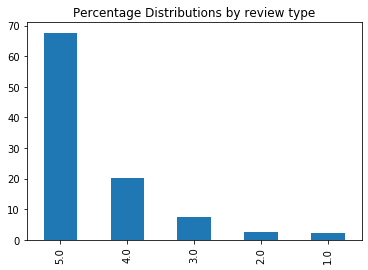

In [62]:
### Checking for the Distribution of Default ###
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(Reviewdata.overall.value_counts(normalize=True)*100,2))
round(Reviewdata.overall.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [63]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [64]:
k = Reviewdata.columns
k

Index(['reviewText', 'overall'], dtype='object')

In [65]:
Reviewdata['reviewText'] = Reviewdata.reviewText.astype(str)

In [66]:
# Let's take a look at the updated text
Reviewdata['cleaned_description'] = pd.DataFrame(Reviewdata['reviewText'].apply(cleaned1))
Reviewdata.head(10)

,reviewText,overall,cleaned_description
0,"Not much to write about here, but it does exac...",5.0,not much to write about here but it does exact...
1,The product does exactly as it should and is q...,5.0,the product does exactly as it should and is q...
2,The primary job of this device is to block the...,5.0,the primary job of this device is to block the...
3,Nice windscreen protects my MXL mic and preven...,5.0,nice windscreen protects my mxl mic and preven...
4,This pop filter is great. It looks and perform...,5.0,this pop filter is great it looks and performs...
5,So good that I bought another one. Love the h...,5.0,so good that i bought another one love the he...
6,"I have used monster cables for years, and with...",5.0,i have used monster cables for years and with ...
7,I now use this cable to run from the output of...,3.0,i now use this cable to run from the output of...
8,Perfect for my Epiphone Sheraton II. Monster ...,5.0,perfect for my epiphone sheraton ii monster c...
9,Monster makes the best cables and a lifetime w...,5.0,monster makes the best cables and a lifetime w...


In [67]:
# Apply a second round of cleaning
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [68]:
# Let's take a look at the updated text
Reviewdata['cleaned_description_new'] = pd.DataFrame(Reviewdata['cleaned_description'].apply(cleaned2))
Reviewdata.head(10)

,reviewText,overall,cleaned_description,cleaned_description_new
0,"Not much to write about here, but it does exac...",5.0,not much to write about here but it does exact...,not much to write about here but it does exact...
1,The product does exactly as it should and is q...,5.0,the product does exactly as it should and is q...,the product does exactly as it should and is q...
2,The primary job of this device is to block the...,5.0,the primary job of this device is to block the...,the primary job of this device is to block the...
3,Nice windscreen protects my MXL mic and preven...,5.0,nice windscreen protects my mxl mic and preven...,nice windscreen protects my mxl mic and preven...
4,This pop filter is great. It looks and perform...,5.0,this pop filter is great it looks and performs...,this pop filter is great it looks and performs...
5,So good that I bought another one. Love the h...,5.0,so good that i bought another one love the he...,so good that i bought another one love the he...
6,"I have used monster cables for years, and with...",5.0,i have used monster cables for years and with ...,i have used monster cables for years and with ...
7,I now use this cable to run from the output of...,3.0,i now use this cable to run from the output of...,i now use this cable to run from the output of...
8,Perfect for my Epiphone Sheraton II. Monster ...,5.0,perfect for my epiphone sheraton ii monster c...,perfect for my epiphone sheraton ii monster c...
9,Monster makes the best cables and a lifetime w...,5.0,monster makes the best cables and a lifetime w...,monster makes the best cables and a lifetime w...


## Model training 

In [69]:
from sklearn.model_selection import train_test_split

Independent_var = Reviewdata.cleaned_description_new
Dependent_var = Reviewdata.overall

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))


IV_train : 9234
IV_test  : 1027
DV_train : 9234
DV_test  : 1027


In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline

In [71]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  1,   3,   6,   7,   1],
       [  2,   6,  15,  35,  35],
       [ 20,  24,  50, 161, 661]], dtype=int64)

## Model prediciton 

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.6835443037974683
Precision :  0.8629447665329801
Recall :  0.6835443037974683


## Trying on new reviews 

In [73]:
example = ["The product done exactly what it should"]
result = model.predict(example)

print(result)

[5.]
